<h1>Organisatorisches: Projekt mit schriftlicher Ausarbeitung</h1>

4. Gruppe:
Thema: Diamond Price Prediction
Vortragstag: 8.1.2025
Mitglieder: Nahid Qazi, Mohaddese Haydari, Azad Akin, Sean Müller, Denis Meyendrisch

### 1. Analyseziel:

- Prognose des Diamantenpreises basierend auf den verfügbaren Merkmalen.  
- Untersuchung der wichtigsten Einflussfaktoren (z.B. Karat, Schliff, Farbe, Reinheit) auf den Preis.  
- Modellierung und Evaluierung der Vorhersagegenauigkeit von mindestens zwei verschiedenen Machine-Learning-Modellen.  
- Visualisierung von Beziehungen und Verteilungen der Merkmale und ihrer Korrelation zum Preis.  

### 2. Kurze Beschreibung der Daten und der Datenqualität

Der vorliegende Datensatz enthält Informationen zu verschiedenen Eigenschaften von Diamanten, die für die Vorhersage ihres Preises verwendet werden. Jedes Datensatzobjekt beschreibt einen einzelnen Diamanten anhand der folgenden Merkmale:

- **Carat (Karat)**: Das Gewicht des Diamanten, ein wichtiger Faktor für den Preis.
- **Cut (Schliff)**: Die Qualität des Schliffs des Diamanten, unterteilt in verschiedene Kategorien wie "Ideal", "Premium", "Good", "Very Good" und "Fair".
- **Color (Farbe)**: Die Farbqualität des Diamanten, bewertet mit einer Skala von D (bestes Weiß) bis Z (farbiger Diamant).
- **Clarity (Reinheit)**: Die Reinheit des Diamanten, die die Anzahl und Sichtbarkeit von Einschlüsse und Unregelmäßigkeiten beschreibt, mit verschiedenen Kategorien wie "VVS1", "VS2", "SI1", "SI2", "I1".
- **Depth (Tiefe)**: Die Tiefe des Diamanten in Prozent.
- **Table (Tabelle)**: Der Anteil der oberen Fläche des Diamanten im Verhältnis zum Durchmesser.
- **Price (Preis)**: Der Marktpreis des Diamanten, der als Zielvariable für die Vorhersage dient.
- **x, y, z**: Die physikalischen Dimensionen des Diamanten (Länge, Breite, Höhe in Millimetern).

Die Daten sind von guter Qualität, da es **keine fehlenden Werte** gibt. Alle Werte sind vollständig und es gibt keine offensichtlichen Inkonsistenzen oder fehlerhaften Einträge. Allerdings sollten die numerischen Merkmale wie `carat`, `depth`, `table` und `price` einer weiteren Überprüfung auf Ausreißer unterzogen werden, um sicherzustellen, dass diese Werte in einem angemessenen Bereich liegen und keine Fehler vorliegen. Kategorische Variablen wie `cut`, `color` und `clarity` wurden bereits in einem standardisierten Format vorverarbeitet.

Insgesamt weist der Datensatz keine fehlenden oder ungültigen Daten auf, was eine gute Grundlage für die Durchführung von Modellierung und Vorhersagen bietet.

#### Import der erforderlichen Module und des Datensatzes

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get the directory where the current notebook is located
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Define the relative path to the dataset
dataset_path = os.path.join(notebook_dir, 'Datasets', 'Diamonds.csv')

# Load the dataset
df = pd.read_csv(dataset_path, sep=',', index_col=0)

# Display the first few rows of the dataset
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 3. Data Cleaning


#### 3.1 Data Cleaning

In [39]:
df['cut'] = df['cut'].str.title()
df['color'] = df['color'].str.upper()
df['clarity'] = df['clarity'].str.upper()

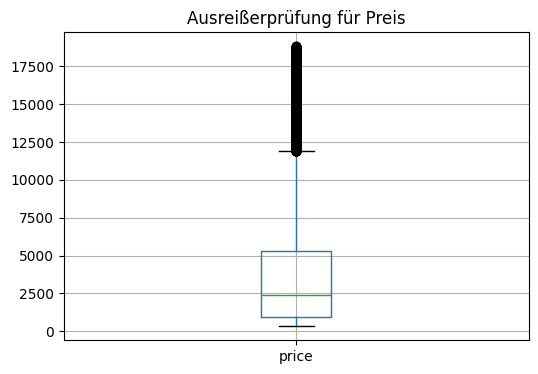

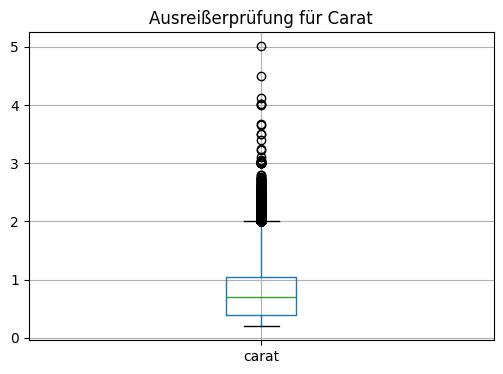

In [40]:
# Boxplot für Ausreißer
df.boxplot(column=['price'], figsize=(6, 4))
plt.title("Ausreißerprüfung für Preis")
plt.show()

df.boxplot(column=['carat'], figsize=(6, 4))
plt.title("Ausreißerprüfung für Carat")
plt.show()


In [41]:
# Kopie von der Originaldatei erstellen, bevor man was drauf speichert/ändert
df_cleaned = df.copy()


In [42]:
# IQR-Methode zur Entfernung von Ausreißern
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Grenzen definieren
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Entferne Ausreißer
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Zeilenanzahl vor und nach der Bereinigung
print("Anzahl der Zeilen vor der Bereinigung:", len(df))
print("Anzahl der Zeilen nach der Bereinigung:", len(df_cleaned))


Anzahl der Zeilen vor der Bereinigung: 53940
Anzahl der Zeilen nach der Bereinigung: 50400


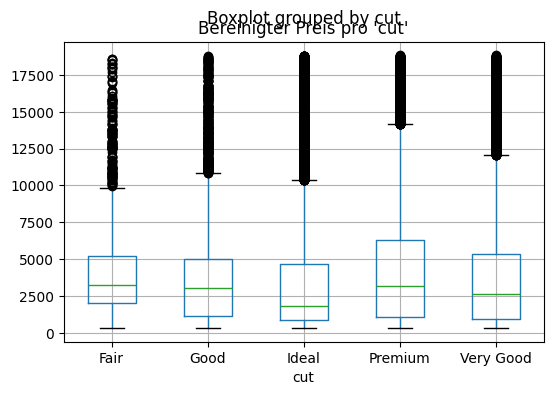

In [43]:
df.boxplot(column=['price'], by='cut', figsize=(6, 4))
plt.title("Bereinigter Preis pro 'cut'")
plt.show()


In [44]:
# Definiere den Pfad zum Ordner "Datasets"
datasets_folder = os.path.join(os.getcwd(), "Datasets")

# Speichern des bereinigten Datensatzes im Ordner "Datasets"
df_cleaned.to_csv(os.path.join(datasets_folder, "diamonds_cleaned.csv"), index=False)



#### 3.2 Missing Value Imputation

In [45]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

-> keine Imputation nötig

### 4. EDA


#### 4.1 Feature Verteilungen, Korrelationen, Visualisierungen


Häufigkeit für cut:


,Anzahl
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\2539172744.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="coolwarm")


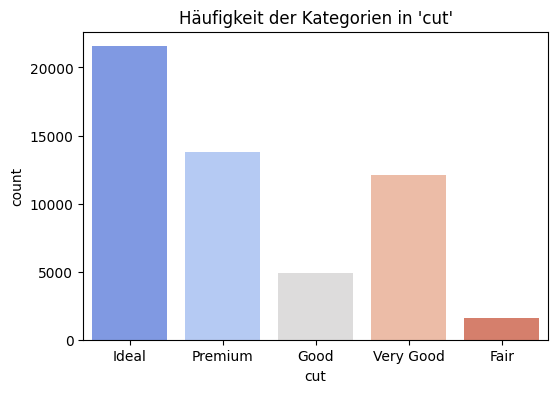

Häufigkeit für color:


,Anzahl
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\2539172744.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="coolwarm")


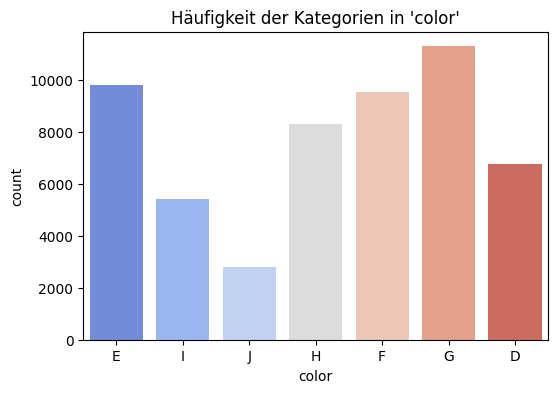

Häufigkeit für clarity:


,Anzahl
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\2539172744.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="coolwarm")


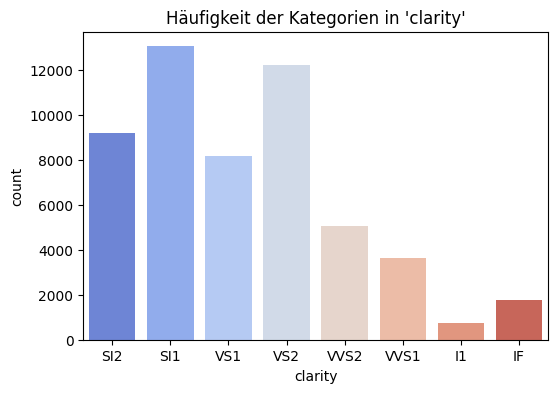

In [46]:
# Kategorische Werte analysieren
CategorialFeatures = ["cut", "color", "clarity"]

# Häufigkeiten analysieren
for feature in CategorialFeatures:
    print(f"Häufigkeit für {feature}:")
    value_counts = df[feature].value_counts()

    # Formatierte Ausgabe
    styled_counts = value_counts.to_frame(name="Anzahl").style.highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
    display(styled_counts)  # Anzeige in Jupyter-Notebook

    # Kategorische Werte visuell darstellen mit Barplots
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette="coolwarm")
    plt.title(f"Häufigkeit der Kategorien in '{feature}'")
    plt.show()


Häufigkeit für cut:


,Anzahl
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


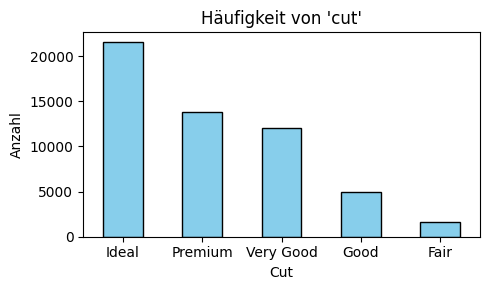

Häufigkeit für color:


,Anzahl
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


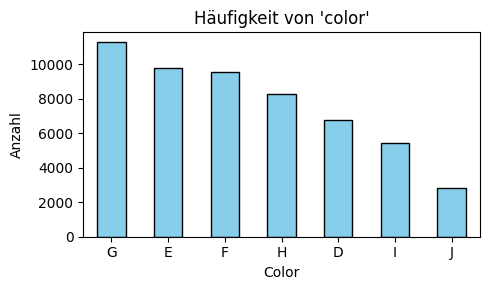

Häufigkeit für clarity:


,Anzahl
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


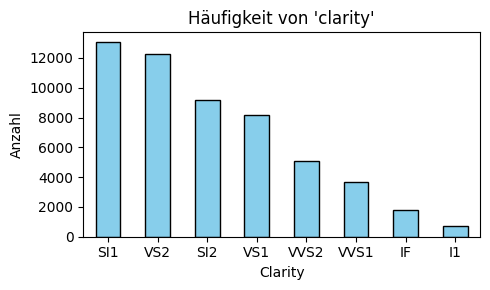

In [47]:
# Häufigkeiten für kategorische Werte
CategorialFeatures = ["cut", "color", "clarity"]
for feature in CategorialFeatures:
    print(f"Häufigkeit für {feature}:")
    value_counts = df[feature].value_counts()

    # Formatierte Ausgabe
    styled_counts = value_counts.to_frame(name="Anzahl").style.highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
    display(styled_counts)  # Anzeige in Jupyter-Notebook

    # Balkendiagramme für kategorische Werte
    df[feature].value_counts().plot(kind='bar', figsize=(5, 3), title=f"Häufigkeit von '{feature}'", color='skyblue', edgecolor='black')
    plt.xlabel(feature.capitalize())
    plt.ylabel("Anzahl")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



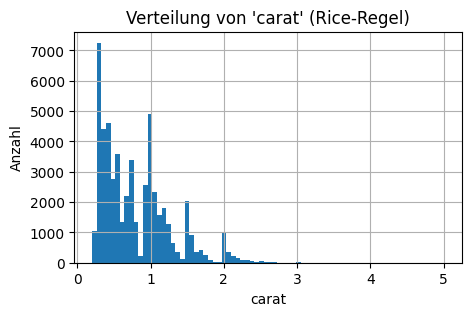

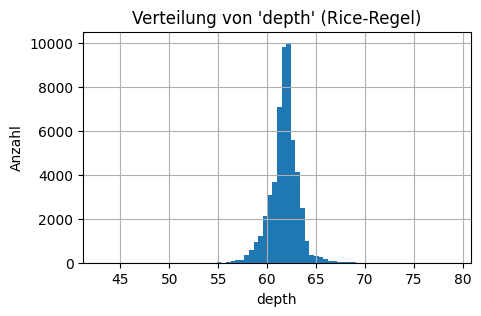

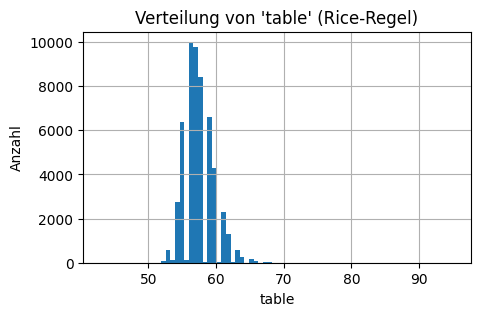

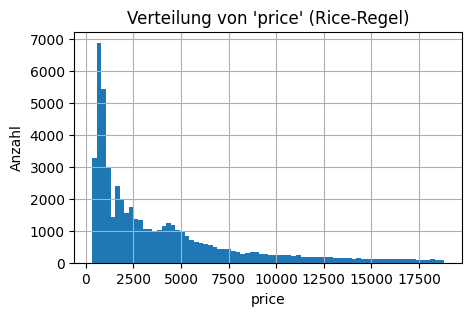

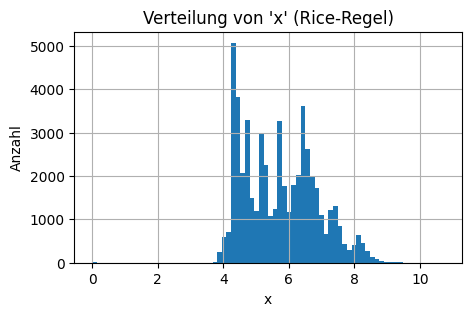

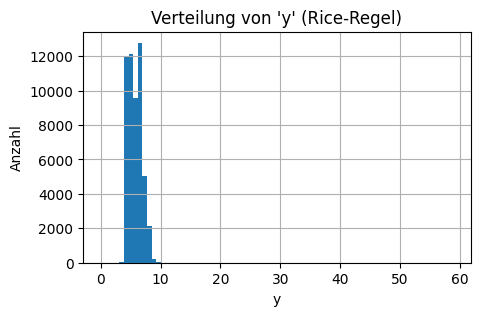

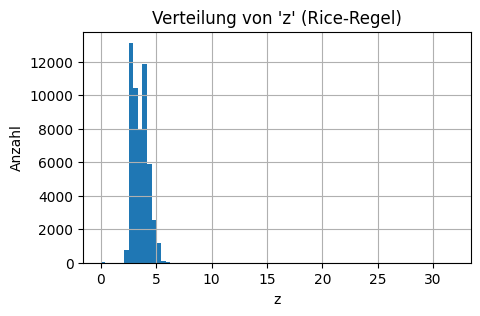

In [48]:
# Liste der numerischen Features
QuantitativeFeatures = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Histogramm -> hier ist Rice-Regel von Vorteil für jedes numerische Feature
for feature in QuantitativeFeatures:
    df[feature].hist(bins="rice", figsize=(5, 3))
    plt.title(f"Verteilung von '{feature}' (Rice-Regel)")
    plt.xlabel(feature)
    plt.ylabel("Anzahl")
    plt.show()


In [49]:
# Statistische Zusammenfassung für numerische Features
QuantitativeFeatures = ["carat", "depth", "table", "price", "x", "y", "z"]
summary_stats = df[QuantitativeFeatures].describe()

# Stilvolle Ausgabe
styled_summary = summary_stats.style.format(precision=2).highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
display(styled_summary)


,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [50]:
# Kategorische Features miteinander vergleichen
# Kreuztabellen für Kategorische Features
crosstab_cut_color = pd.crosstab(df['cut'], df['color'])
crosstab_cut_clarity = pd.crosstab(df['cut'], df['clarity'])
crosstab_color_clarity = pd.crosstab(df['color'], df['clarity'])

print("Kreuztabelle zwischen 'cut' und 'color':\n", crosstab_cut_color)
print("\nKreuztabelle zwischen 'cut' und 'clarity':\n", crosstab_cut_clarity)
print("\nKreuztabelle zwischen 'color' und 'clarity':\n", crosstab_color_clarity)


Kreuztabelle zwischen 'cut' und 'color':
 color         D     E     F     G     H     I    J
cut                                               
Fair        163   224   312   314   303   175  119
Good        662   933   909   871   702   522  307
Ideal      2834  3903  3826  4884  3115  2093  896
Premium    1603  2337  2331  2924  2360  1428  808
Very Good  1513  2400  2164  2299  1824  1204  678

Kreuztabelle zwischen 'cut' und 'clarity':
 clarity     I1    IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                     
Fair       210     9   408   466   170   261    17    69
Good        96    71  1560  1081   648   978   186   286
Ideal      146  1212  4282  2598  3589  5071  2047  2606
Premium    205   230  3575  2949  1989  3357   616   870
Very Good   84   268  3240  2100  1775  2591   789  1235

Kreuztabelle zwischen 'color' und 'clarity':
 clarity   I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2
color                                                
D 

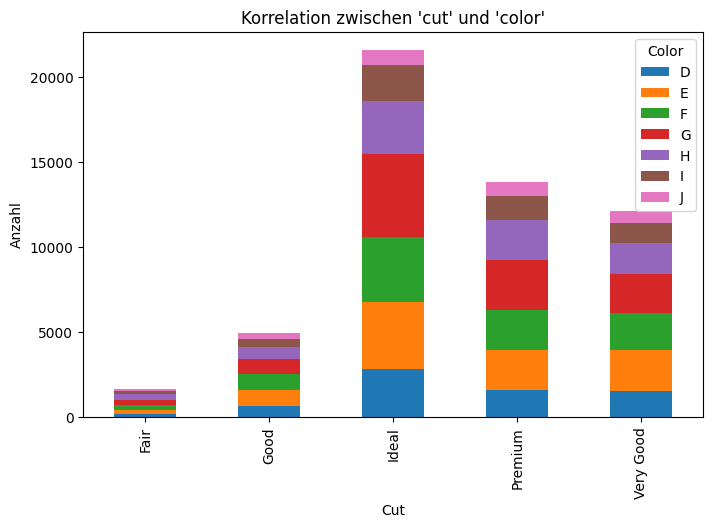

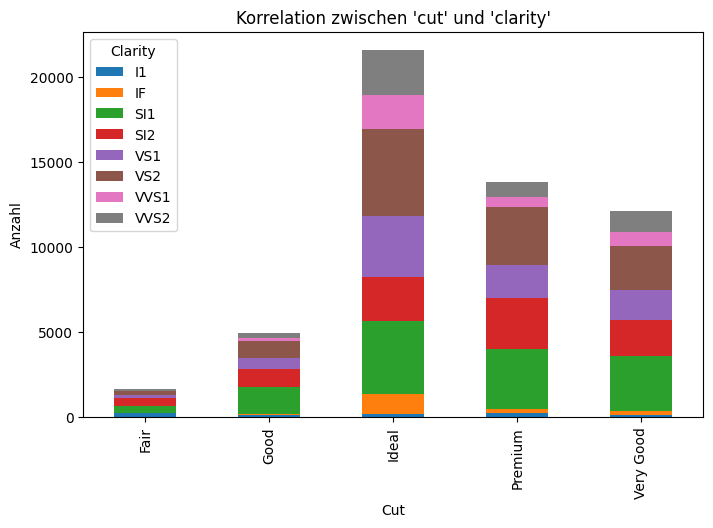

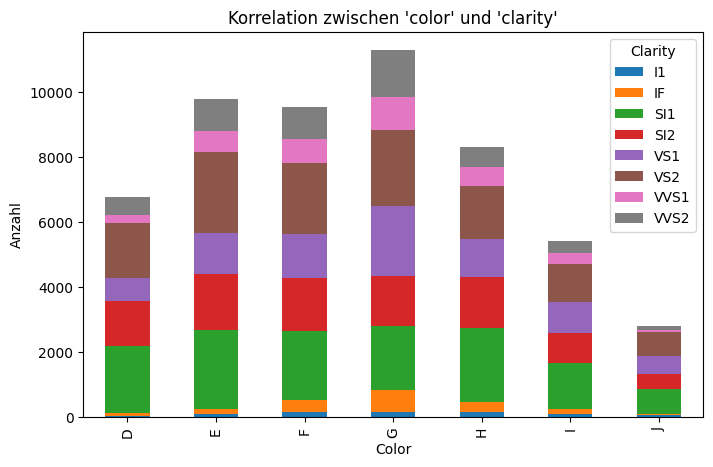

In [51]:
# Gestapeltes Balkendiagramm für Cut und Color
crosstab_cut_color.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'cut' und 'color'")
plt.xlabel("Cut")
plt.ylabel("Anzahl")
plt.legend(title="Color")
plt.show()

# Gestapeltes Balkendiagramm für Cut und Clarity
crosstab_cut_clarity.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'cut' und 'clarity'")
plt.xlabel("Cut")
plt.ylabel("Anzahl")
plt.legend(title="Clarity")
plt.show()

# Gestapeltes Balkendiagramm für Color und Clarity
crosstab_color_clarity.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'color' und 'clarity'")
plt.xlabel("Color")
plt.ylabel("Anzahl")
plt.legend(title="Clarity")
plt.show()


In [52]:
# Definiere den Pfad zum Ordner "Datasets"
datasets_folder = os.path.join(os.getcwd(), "Datasets")

crosstab_cut_color.to_csv(os.path.join(datasets_folder, "cut_vs_color.csv"))
crosstab_cut_clarity.to_csv(os.path.join(datasets_folder, "cut_vs_clarity.csv"))
crosstab_color_clarity.to_csv(os.path.join(datasets_folder, "color_vs_clarity.csv"))

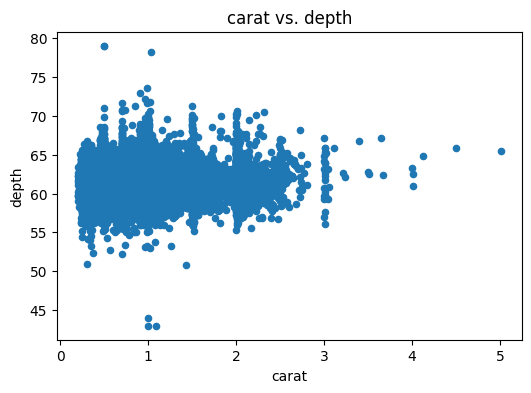

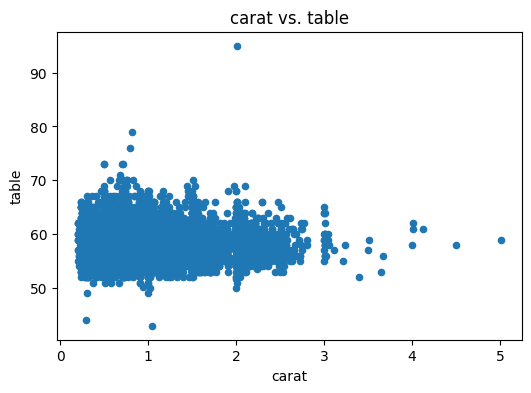

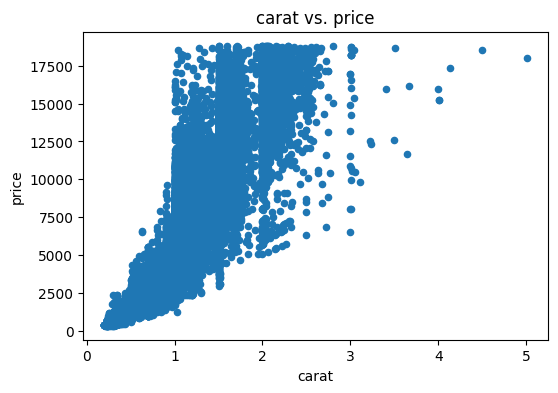

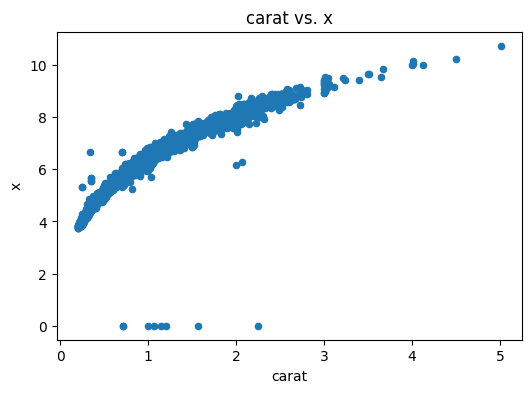

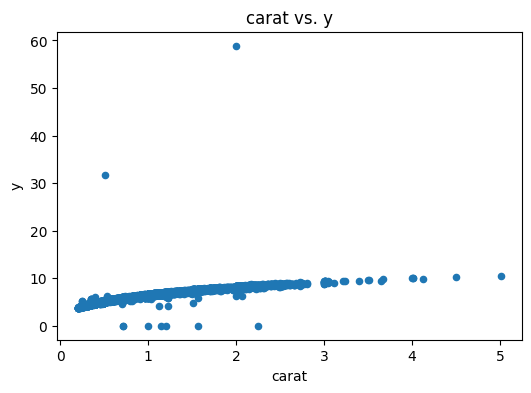

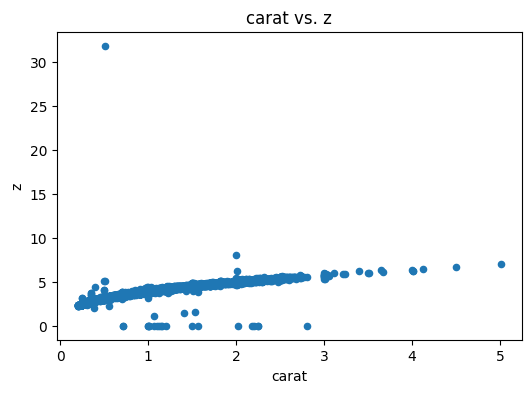

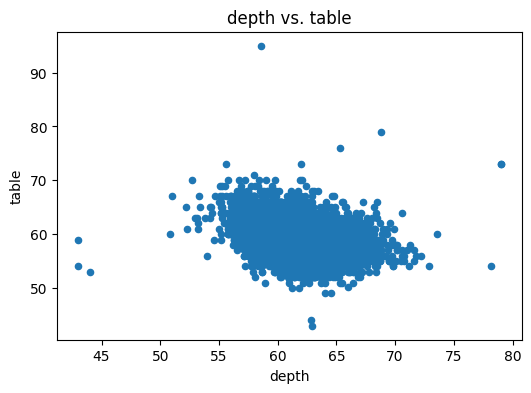

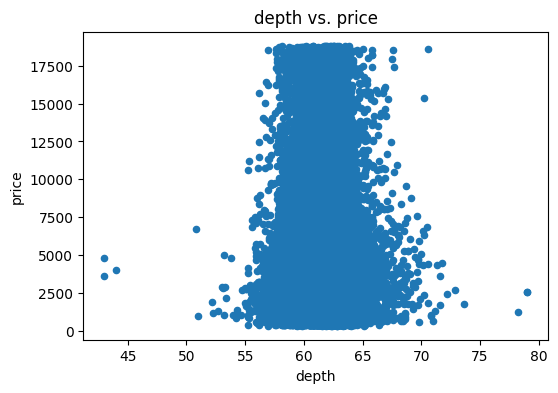

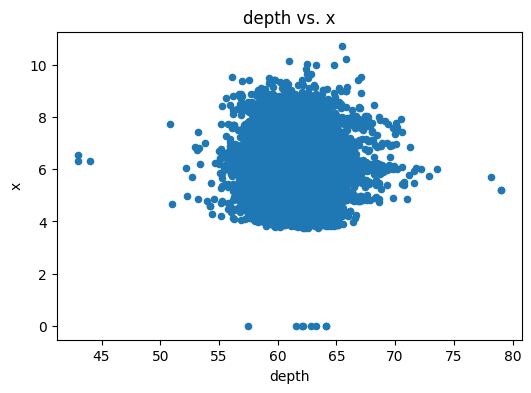

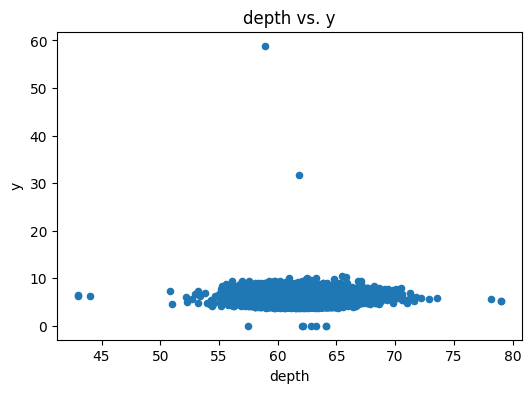

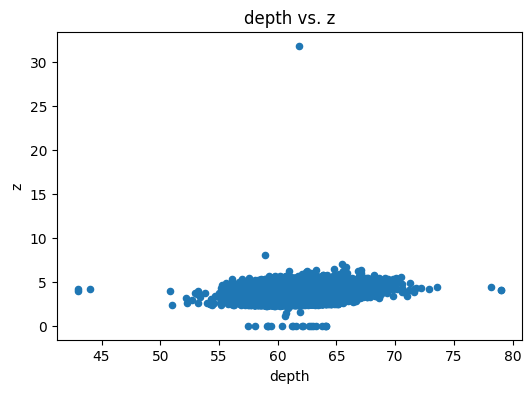

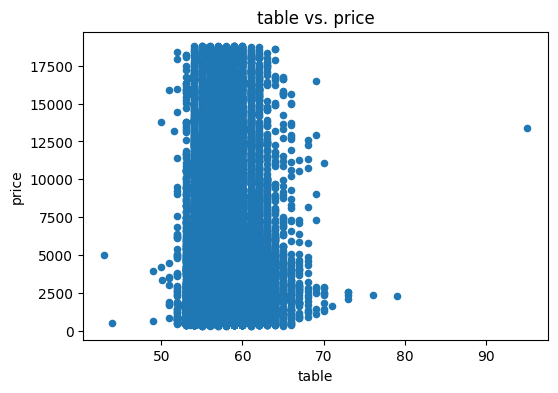

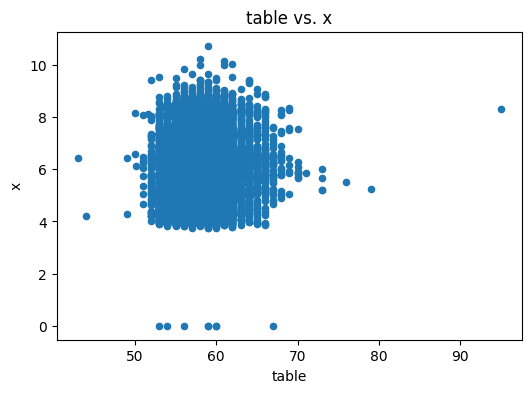

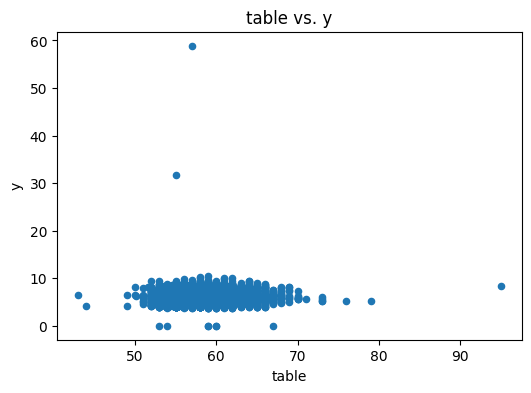

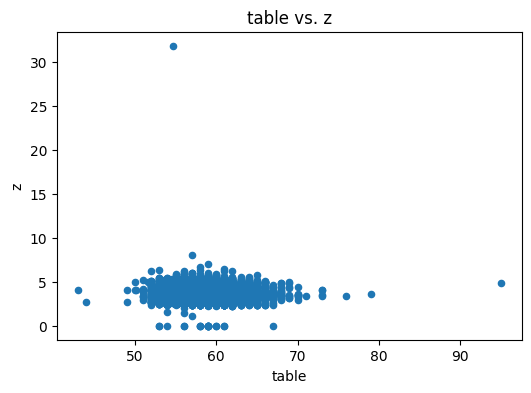

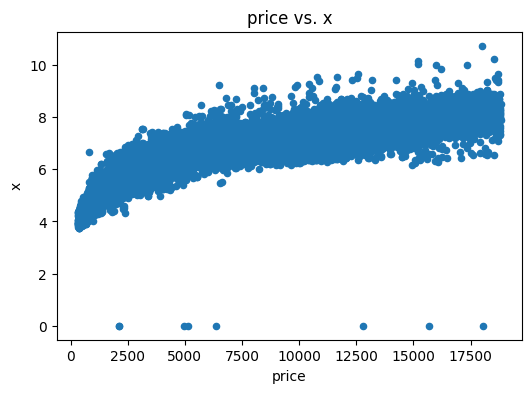

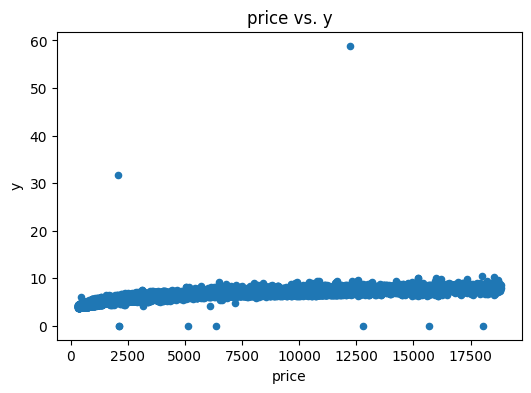

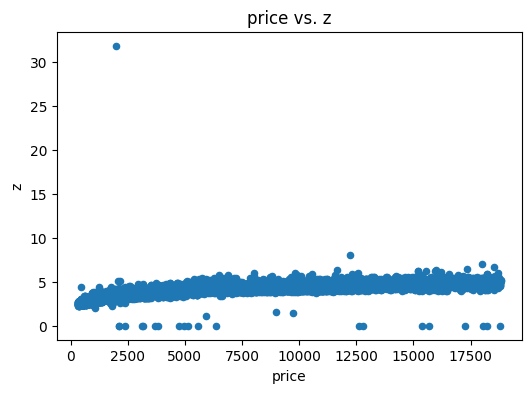

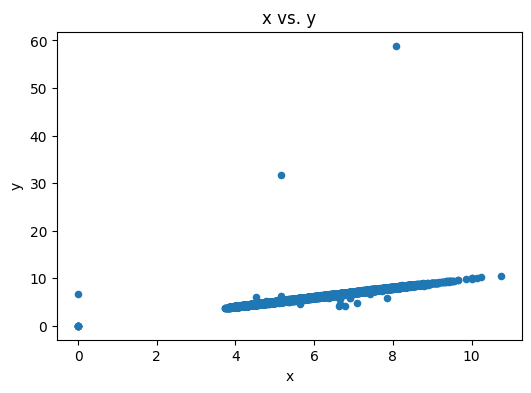

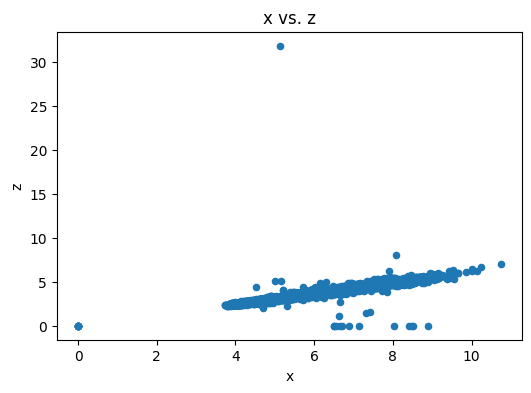

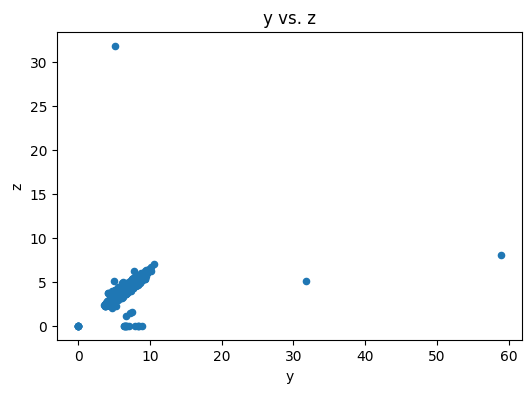

In [53]:
# Quantitative Werte mit Quantitativen Werten vergleichen (Scatterplots)
QuantitativeFeatures = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for i, feature_x in enumerate(QuantitativeFeatures):
    for j, feature_y in enumerate(QuantitativeFeatures):
        if i < j:  # Vermeidung von doppelten Kombinationen
            df.plot.scatter(x=feature_x, y=feature_y, figsize=(6, 4))
            plt.title(f"{feature_x} vs. {feature_y}")
            plt.show()


In [54]:
# Korrelationstabelle für numerische Features -> Wie hängen numerische Features miteinander zusammen
# Werte zwischen -1 und +1: 
# +1: Starke positive Korrelation (beide Werte steigen gemeinsam).
# -1: Starke negative Korrelation (ein Wert steigt, der andere sinkt).
# 0: Keine lineare Korrelation.
# Korrelationstabelle für numerische Features
QuantitativeFeatures = df.select_dtypes(include=['float64', 'int64'])

# Korrelationstabelle berechnen
correlation_matrix = QuantitativeFeatures.corr(method='pearson')
print("Korrelationstabelle:\n", correlation_matrix)


Korrelationstabelle:
           carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


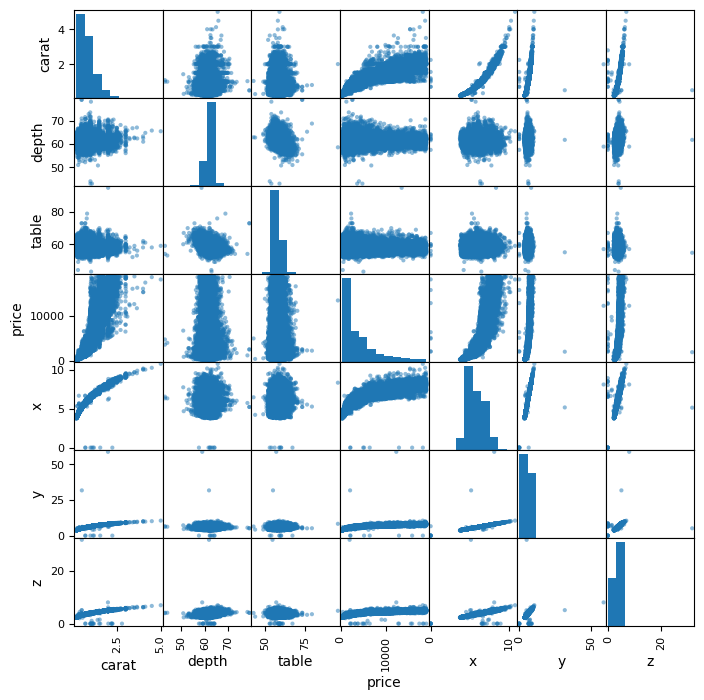

In [55]:
# Scatter-Matrix für alle quantitativen Features
QuantitativeFeatures = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

scatter_matrix(df[QuantitativeFeatures], figsize=(8, 8), diagonal='hist')
plt.show()


In [56]:
# Zusammenfassung der Preisdaten pro `cut`
print(df.groupby('cut')['price'].describe())

# Zusammenfassung der Preisdaten pro `color`
print(df.groupby('color')['price'].describe())

# Zusammenfassung der Preisdaten pro `clarity`
print(df.groupby('clarity')['price'].describe())


             count         mean          std    min      25%     50%      75%  \
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Very Good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   

               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very Good  18818.0  
         count         mean          std    min     25%     50%      75%  \
color                                                                      
D       6775.0  3169.954096  3356.590935  357.0   911.0  1838.0  4213.50   
E       9797.0  3076.752475  3344.158685  326.0   882.0  

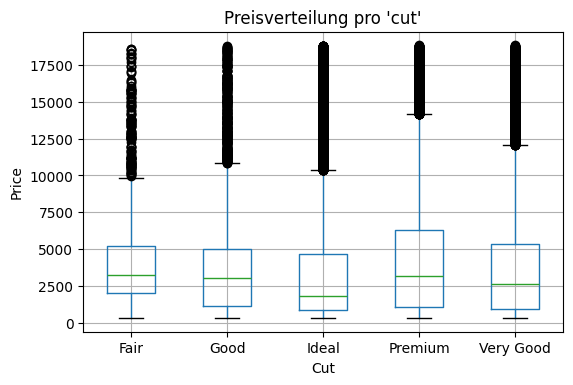

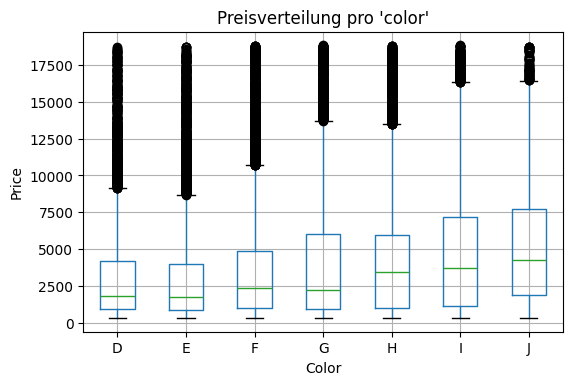

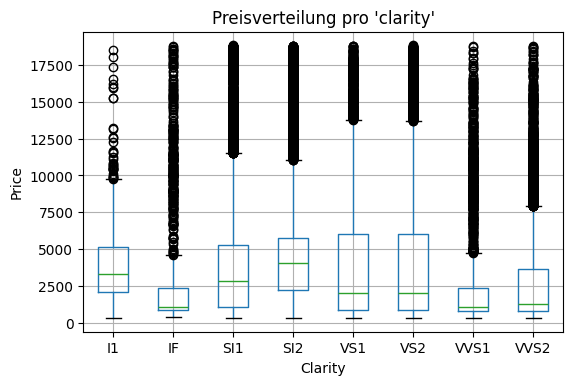

In [57]:
# Boxplot für Preis pro `cut`
df.boxplot(column=['price'], by='cut', figsize=(6, 4))
plt.title("Preisverteilung pro 'cut'")
plt.suptitle("")  # Entfernt den Standardtitel
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

# Boxplot für Preis pro `color`
df.boxplot(column=['price'], by='color', figsize=(6, 4))
plt.title("Preisverteilung pro 'color'")
plt.suptitle("")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

# Boxplot für Preis pro `clarity`
df.boxplot(column=['price'], by='clarity', figsize=(6, 4))
plt.title("Preisverteilung pro 'clarity'")
plt.suptitle("")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()


<Figure size 600x400 with 0 Axes>

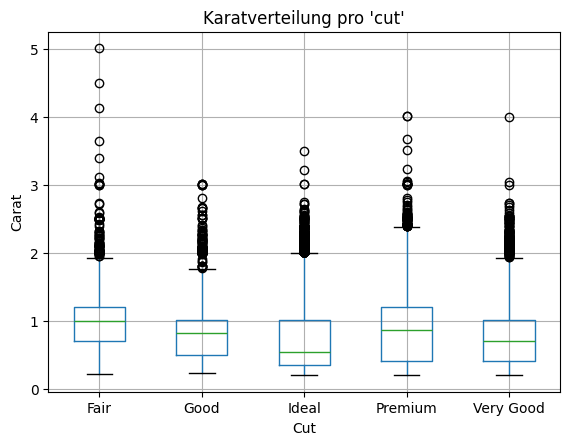

<Figure size 600x400 with 0 Axes>

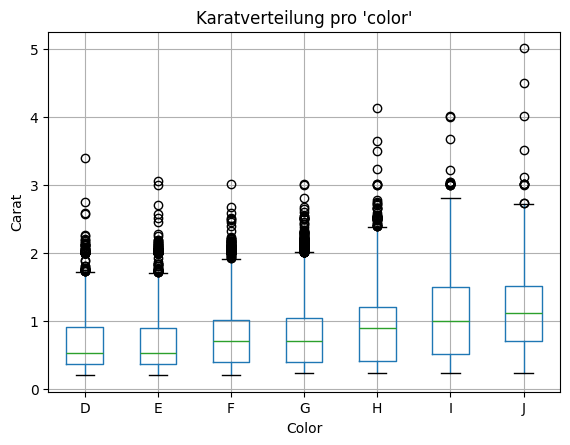

<Figure size 600x400 with 0 Axes>

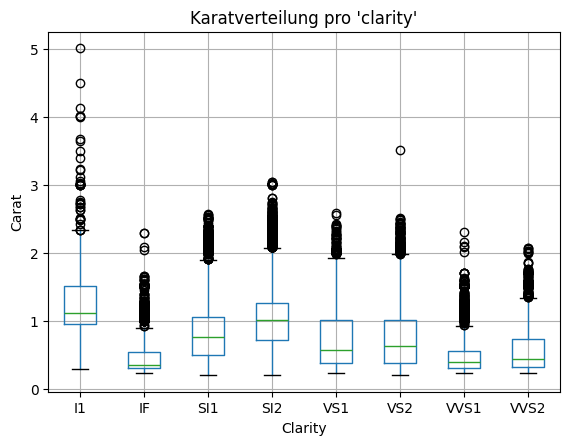

In [58]:

# Boxplot für `carat` vs. `cut`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='cut')
plt.title("Karatverteilung pro 'cut'")
plt.suptitle("")
plt.xlabel("Cut")
plt.ylabel("Carat")
plt.show()

# Boxplot für `carat` vs. `color`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='color')
plt.title("Karatverteilung pro 'color'")
plt.suptitle("")
plt.xlabel("Color")
plt.ylabel("Carat")
plt.show()

# Boxplot für `carat` vs. `clarity`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='clarity')
plt.title("Karatverteilung pro 'clarity'")
plt.suptitle("")
plt.xlabel("Clarity")
plt.ylabel("Carat")
plt.show()


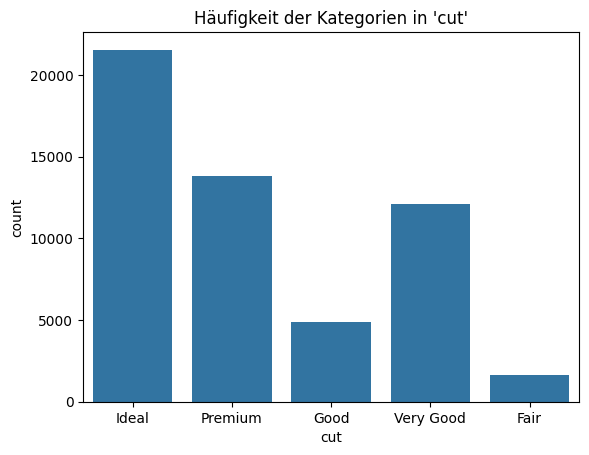

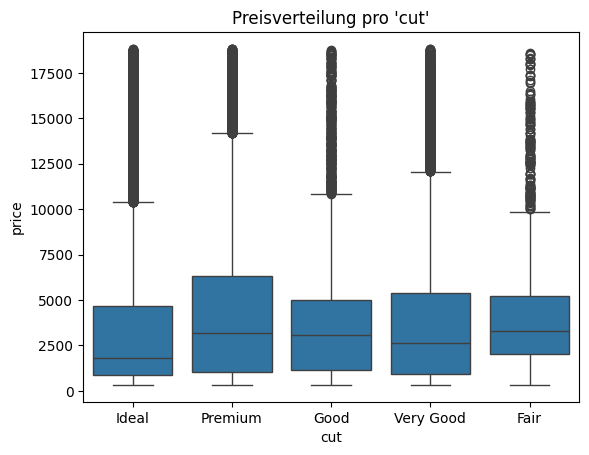

In [59]:

# Barplot für `cut`
sns.countplot(data=df, x='cut')
plt.title("Häufigkeit der Kategorien in 'cut'")
plt.show()

# Boxplot für Preis pro `cut`
sns.boxplot(data=df, x='cut', y='price')
plt.title("Preisverteilung pro 'cut'")
plt.show()

### 5. Feature Engeneering

In [60]:
print(df["cut"].unique())
print(df['clarity'].unique())
print(df['color'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [61]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

encoder = OrdinalEncoder(categories=[cut_categories, clarity_categories, color_categories])

ordinal_encoded = encoder.fit_transform(df[['cut', 'clarity', 'color']])


ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns = encoder.get_feature_names_out(['cut','clarity', 'color']))
print(ordinal_encoded_df.head())


df_ordinal_encoded = pd.concat([df.drop(['cut', 'clarity', 'color'], axis=1), ordinal_encoded_df], axis=1)
df = df_ordinal_encoded
df.head(12)


   cut  clarity  color
0  4.0      1.0    5.0
1  3.0      2.0    5.0
2  1.0      4.0    5.0
3  3.0      3.0    1.0
4  1.0      1.0    0.0


,carat,depth,table,price,x,y,z,cut,clarity,color
1,0.23,61.5,55.0,326.0,3.95,3.98,2.43,3.0,2.0,5.0
2,0.21,59.8,61.0,326.0,3.89,3.84,2.31,1.0,4.0,5.0
3,0.23,56.9,65.0,327.0,4.05,4.07,2.31,3.0,3.0,1.0
4,0.29,62.4,58.0,334.0,4.20,4.23,2.63,1.0,1.0,0.0
5,0.31,63.3,58.0,335.0,4.34,4.35,2.75,2.0,5.0,0.0
6,0.24,62.8,57.0,336.0,3.94,3.96,2.48,2.0,6.0,1.0
7,0.24,62.3,57.0,336.0,3.95,3.98,2.47,2.0,2.0,2.0
8,0.26,61.9,55.0,337.0,4.07,4.11,2.53,0.0,3.0,5.0
9,0.22,65.1,61.0,337.0,3.87,3.78,2.49,2.0,4.0,2.0
10,0.23,59.4,61.0,338.0,4.00,4.05,2.39,1.0,2.0,0.0


In [62]:
df['price_per_carat'] = df['price'] / df['carat']
df['volume'] = df['x'] * df['y'] * df['z']
df['form_factor'] = df['x'] / df['y']
df['price_to_volume'] = df['price'] / df['volume']
df['mean_dimension'] = (df['x'] + df['y'] + df['z']) / 3
df['table_to_depth_ratio'] = df['table'] / df['depth']
df.head()


,carat,depth,table,price,x,y,z,cut,clarity,color,price_per_carat,volume,form_factor,price_to_volume,mean_dimension,table_to_depth_ratio
1,0.23,61.5,55.0,326.0,3.95,3.98,2.43,3.0,2.0,5.0,1417.391304,38.202030,0.992462,8.533578,3.453333,0.894309
2,0.21,59.8,61.0,326.0,3.89,3.84,2.31,1.0,4.0,5.0,1552.380952,34.505856,1.013021,9.447672,3.346667,1.020067
3,0.23,56.9,65.0,327.0,4.05,4.07,2.31,3.0,3.0,1.0,1421.739130,38.076885,0.995086,8.587887,3.476667,1.142355
4,0.29,62.4,58.0,334.0,4.20,4.23,2.63,1.0,1.0,0.0,1151.724138,46.724580,0.992908,7.148272,3.686667,0.929487
5,0.31,63.3,58.0,335.0,4.34,4.35,2.75,2.0,5.0,0.0,1080.645161,51.917250,0.997701,6.452576,3.813333,0.916272


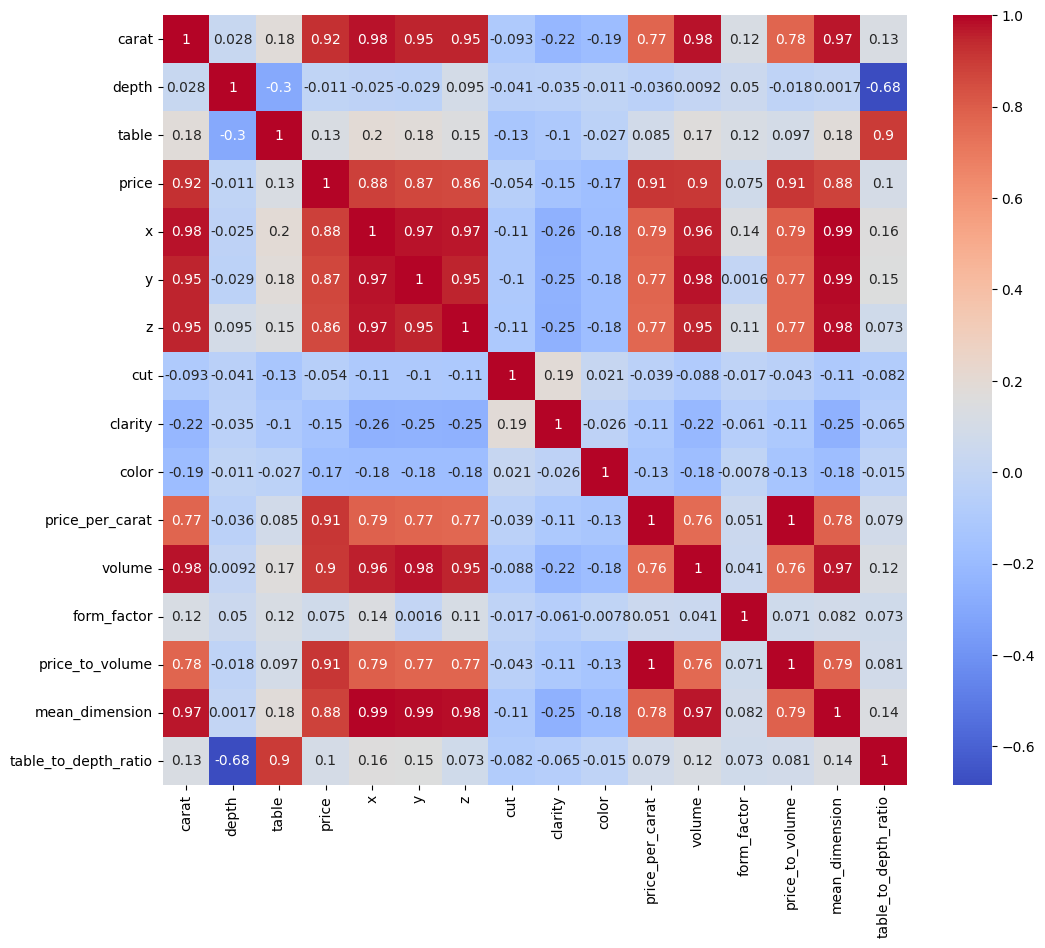

,carat,table,price,x,y,z,clarity,color,price_per_carat,volume,price_to_volume,mean_dimension,table_to_depth_ratio
1,0.23,55.0,326.0,3.95,3.98,2.43,2.0,5.0,1417.391304,38.202030,8.533578,3.453333,0.894309
2,0.21,61.0,326.0,3.89,3.84,2.31,4.0,5.0,1552.380952,34.505856,9.447672,3.346667,1.020067
3,0.23,65.0,327.0,4.05,4.07,2.31,3.0,1.0,1421.739130,38.076885,8.587887,3.476667,1.142355
4,0.29,58.0,334.0,4.20,4.23,2.63,1.0,0.0,1151.724138,46.724580,7.148272,3.686667,0.929487
5,0.31,58.0,335.0,4.34,4.35,2.75,5.0,0.0,1080.645161,51.917250,6.452576,3.813333,0.916272


In [63]:

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

corr_with_target = correlation_matrix['price'].abs()
threshold = 0.1
selected_features = corr_with_target[corr_with_target > threshold].index.tolist()

df_selected = df[selected_features]
df_selected.head()


In [64]:
df_selected = df_selected.drop(columns=['Unnamed: 0'], errors='ignore') #unnamed wird entfernt
df= df_selected
df.head()

,carat,table,price,x,y,z,clarity,color,price_per_carat,volume,price_to_volume,mean_dimension,table_to_depth_ratio
1,0.23,55.0,326.0,3.95,3.98,2.43,2.0,5.0,1417.391304,38.202030,8.533578,3.453333,0.894309
2,0.21,61.0,326.0,3.89,3.84,2.31,4.0,5.0,1552.380952,34.505856,9.447672,3.346667,1.020067
3,0.23,65.0,327.0,4.05,4.07,2.31,3.0,1.0,1421.739130,38.076885,8.587887,3.476667,1.142355
4,0.29,58.0,334.0,4.20,4.23,2.63,1.0,0.0,1151.724138,46.724580,7.148272,3.686667,0.929487
5,0.31,58.0,335.0,4.34,4.35,2.75,5.0,0.0,1080.645161,51.917250,6.452576,3.813333,0.916272


In [65]:

y= df['price']                                                                                              #daten wurden in features x und zielwert y sowie in Trainings- und Testsets aufgeteilt 
X= df.drop(columns=['price'])

X_train, X_test, y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=42)


In [66]:

# Überprüfe die Daten auf fehlende Werte
print("Anzahl fehlender Werte in den Features:")
print(df.isnull().sum())

# Entferne Zeilen mit fehlenden Werten
df = df.dropna()

# Überprüfe die Daten auf nicht-numerische Werte
print("Datentypen der Features:")
print(df.dtypes)

# Initialisiere den StandardScaler
scaler = StandardScaler()




Anzahl fehlender Werte in den Features:
carat                   1
table                   1
price                   1
x                       1
y                       1
z                       1
clarity                 1
color                   1
price_per_carat         1
volume                  1
price_to_volume         1
mean_dimension          1
table_to_depth_ratio    1
dtype: int64
Datentypen der Features:
carat                   float64
table                   float64
price                   float64
x                       float64
y                       float64
z                       float64
clarity                 float64
color                   float64
price_per_carat         float64
volume                  float64
price_to_volume         float64
mean_dimension          float64
table_to_depth_ratio    float64
dtype: object


In [67]:

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe die Daten auf nicht-numerische Werte
print("Datentypen der Features:")
print(df.dtypes)

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


Anzahl unendlicher Werte in den Features:
carat                   0
table                   0
price                   0
x                       0
y                       0
z                       0
clarity                 0
color                   0
price_per_carat         0
volume                  0
price_to_volume         0
mean_dimension          0
table_to_depth_ratio    0
dtype: int64
Datentypen der Features:
carat                   float64
table                   float64
price                   float64
x                       float64
y                       float64
z                       float64
clarity                 float64
color                   float64
price_per_carat         float64
volume                  float64
price_to_volume         float64
mean_dimension          float64
table_to_depth_ratio    float64
dtype: object
Erste Zeilen des skalierten DataFrames:
      carat     table         x         y         z   clarity     color  \
0 -1.198195 -1.099748 -1.591557 -1.53

C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\3136859408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\3136859408.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [68]:

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe auf extreme Werte
print("Maximale Werte in den Features:")
print(df.max())

print("Minimale Werte in den Features:")
print(df.min())

# Korrigiere extreme Werte
extreme_cols = ['price_to_volume', 'table_to_depth_ratio']
for col in extreme_cols:
    median = df[col].median()
    df[col] = np.where(np.abs(df[col]) > 1e10, median, df[col])

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


Anzahl unendlicher Werte in den Features:
carat                   0
table                   0
price                   0
x                       0
y                       0
z                       0
clarity                 0
color                   0
price_per_carat         0
volume                  0
price_to_volume         0
mean_dimension          0
table_to_depth_ratio    0
dtype: int64
Maximale Werte in den Features:
carat                       5.010000
table                      95.000000
price                   18823.000000
x                          10.740000
y                          58.900000
z                          31.800000
clarity                     7.000000
color                       6.000000
price_per_carat         17828.846154
volume                   3840.598060
price_to_volume           131.044864
mean_dimension             25.016667
table_to_depth_ratio        1.621160
dtype: float64
Minimale Werte in den Features:
carat                      0.200000
table      

C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\3699028513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\3699028513.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\3699028513.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Erste Zeilen des skalierten DataFrames:
      carat     table         x         y         z   clarity     color  \
0 -1.198195 -1.099748 -1.591557 -1.539203 -1.580067 -0.638202  0.936983   
1 -1.240407  1.585971 -1.645156 -1.661996 -1.750878  0.576026  0.936983   
2 -1.198195  3.376449 -1.502225 -1.460264 -1.750878 -0.031088 -1.414289   
3 -1.071558  0.243111 -1.368228 -1.319929 -1.295381 -1.245316 -2.002106   
4 -1.029346  0.243111 -1.243163 -1.214677 -1.124570  1.183139 -2.002106   

   price_per_carat    volume  price_to_volume  mean_dimension  \
0        -1.287387 -1.172282        -1.291368       -1.584282   
1        -1.220301 -1.219536        -1.217876       -1.693388   
2        -1.285226 -1.173882        -1.287002       -1.560415   
3        -1.419417 -1.063325        -1.402745       -1.345611   
4        -1.454741 -0.996940        -1.458678       -1.216047   

   table_to_depth_ratio  price  
0             -0.767817    NaN  
1              1.846227  326.0  
2              4.38

In [69]:

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe auf extreme Werte
print("Maximale Werte in den Features:")
print(df.max())

print("Minimale Werte in den Features:")
print(df.min())

# Korrigiere extreme Werte
extreme_cols = ['price_to_volume', 'table_to_depth_ratio']
for col in extreme_cols:
    max_value = df[col].max()
    min_value = df[col].min()
    print(f"Max value for {col}: {max_value}")
    print(f"Min value for {col}: {min_value}")
    df[col] = np.where(df[col] > 1e4, 1e4, df[col])  # Clipping extreme high values
    df[col] = np.where(df[col] < -1e4, -1e4, df[col])  # Clipping extreme low values

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


Anzahl unendlicher Werte in den Features:
carat                   0
table                   0
price                   0
x                       0
y                       0
z                       0
clarity                 0
color                   0
price_per_carat         0
volume                  0
price_to_volume         0
mean_dimension          0
table_to_depth_ratio    0
dtype: int64
Maximale Werte in den Features:
carat                       5.010000
table                      95.000000
price                   18823.000000
x                          10.740000
y                          58.900000
z                          31.800000
clarity                     7.000000
color                       6.000000
price_per_carat         17828.846154
volume                   3840.598060
price_to_volume           131.044864
mean_dimension             25.016667
table_to_depth_ratio        1.621160
dtype: float64
Minimale Werte in den Features:
carat                      0.200000
table      

C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\2343952293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\2343952293.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\DANY\AppData\Local\Temp\ipykernel_58616\2343952293.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [70]:
# Daten skalieren mit Standardization

scaler = StandardScaler()

X = df.drop('price', axis=1)
y = df['price']

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

print("Erste Zeilen des skalierten DataFrames:")
df_scaled.head()

Erste Zeilen des skalierten DataFrames:


,carat,table,x,y,z,clarity,color,price_per_carat,volume,price_to_volume,mean_dimension,table_to_depth_ratio,price
0,-1.198195,-1.099748,-1.591557,-1.539203,-1.580067,-0.638202,0.936983,-1.287387,-1.172282,-1.291368,-1.584282,-0.767817,NaN
1,-1.240407,1.585971,-1.645156,-1.661996,-1.750878,0.576026,0.936983,-1.220301,-1.219536,-1.217876,-1.693388,1.846227,326.0
2,-1.198195,3.376449,-1.502225,-1.460264,-1.750878,-0.031088,-1.414289,-1.285226,-1.173882,-1.287002,-1.560415,4.388146,326.0
3,-1.071558,0.243111,-1.368228,-1.319929,-1.295381,-1.245316,-2.002106,-1.419417,-1.063325,-1.402745,-1.345611,-0.036591,327.0
4,-1.029346,0.243111,-1.243163,-1.214677,-1.124570,1.183139,-2.002106,-1.454741,-0.996940,-1.458678,-1.216047,-0.311292,334.0


In [71]:
# Daten Skalieren mit Minmax scaling 

scaler = MinMaxScaler()

X = df.drop('price', axis=1)
y = df['price']

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

print("Erste Zeilen des skalierten DataFrames:")
df_scaled.head()


Erste Zeilen des skalierten DataFrames:


,carat,table,x,y,z,clarity,color,price_per_carat,volume,price_to_volume,mean_dimension,table_to_depth_ratio,price
0,0.006237,0.230769,0.031384,0.005433,0.044256,0.285714,0.833333,0.021828,0.001705,0.048053,0.009796,0.224721,NaN
1,0.002079,0.346154,0.022825,0.002898,0.040351,0.571429,0.833333,0.029874,0.000735,0.055155,0.004898,0.358858,326.0
2,0.006237,0.423077,0.045649,0.007063,0.040351,0.428571,0.166667,0.022087,0.001672,0.048475,0.010868,0.489294,326.0
3,0.018711,0.288462,0.067047,0.009960,0.050765,0.142857,0.000000,0.005994,0.003943,0.037288,0.020511,0.262243,327.0
4,0.022869,0.288462,0.087019,0.012133,0.054670,0.714286,0.000000,0.001757,0.005306,0.031883,0.026328,0.248147,334.0


### 6. ML-Modellierung

In [78]:
# Step 1: Split the dataset into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Optional: Display the model coefficients to understand feature importance
print("\nModel Coefficients:")
coeff_df = pd.DataFrame(linear_regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


Mean Squared Error (MSE): 527672.0105021218
R-squared (R²): 0.9670901543650576

Model Coefficients:
                      Coefficient
carat                 8508.535383
table                   -2.481905
x                     -430.946988
y                     -758.936216
z                    -1868.020230
clarity                -38.931337
color                  -19.201487
price_per_carat          1.456366
volume                  18.010494
price_to_volume        -50.257859
mean_dimension       -1019.301145
table_to_depth_ratio  -311.877648
